<a href="https://colab.research.google.com/github/UsamaTheSyed/Diabetic-dataset/blob/main/chp_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:

token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [ ]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [ ]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6651 - acc: 0.6291 - val_loss: 0.6099 - val_acc: 0.7050
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5340 - acc: 0.7541 - val_loss: 0.5233 - val_acc: 0.7324
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4592 - acc: 0.7882 - val_loss: 0.4982 - va

In [ ]:
! unzip aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/5502_10.txt  
  inflating: aclImdb/train/pos/5503_10.txt  
  inflating: aclImdb/train/pos/5504_10.txt  
  inflating: aclImdb/train/pos/5505_10.txt  
  inflating: aclImdb/train/pos/5506_10.txt  
  inflating: aclImdb/train/pos/5507_7.txt  
  inflating: aclImdb/train/pos/5508_10.txt  
  inflating: aclImdb/train/pos/5509_10.txt  
  inflating: aclImdb/train/pos/550_10.txt  
  inflating: aclImdb/train/pos/5510_10.txt  
  inflating: aclImdb/train/pos/5511_8.txt  
  inflating: aclImdb/train/pos/5512_7.txt  
  inflating: aclImdb/train/pos/5513_7.txt  
  inflating: aclImdb/train/pos/5514_9.txt  
  inflating: aclImdb/train/pos/5515_7.txt  
  inflating: aclImdb/train/pos/5516_7.txt  
  inflating: aclImdb/train/pos/5517_9.txt  
  inflating: aclImdb/train/pos/5518_8.txt  
  inflating: aclImdb/train/pos/5519_9.txt  
  inflating: aclImdb/train/pos/551_8.txt  
  inflating: aclImdb/train/pos/5520_9.txt  
  inflating: aclIm

In [ ]:
import os
imdb_dir = '/content/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [ ]:
!unzip glove.6B.100d.txt.zip

Archive:  glove.6B.100d.txt.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.100d.txt.zip or
        glove.6B.100d.txt.zip.zip, and cannot find glove.6B.100d.txt.zip.ZIP, period.


In [ ]:
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, '/content/glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 31776 word vectors.


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 138ms/step - loss: 1.2528 - acc: 0.5200 - val_loss: 0.7873 - val_acc: 0.5008
Epoch 2/10
7/7 [==============================] - 1s 118ms/step - loss: 0.6037 - acc: 0.6450 - val_loss: 0.6957 - val_acc: 0.5334
Epoch 3/10
7/7 [==============================] - 1s 129ms/step - loss: 0.3733 - acc: 0.9250 - val_loss: 0.7935 - val_acc: 0.5092
Epoch 4/10
7/7 [==============================] - 1s 145ms/step - loss: 0.4149 - acc: 0.7500 - val_loss: 0.8858 - val_acc: 0.5062
Epoch 5/10
7/7 [==============================] - 1s 220ms/step - loss: 0.2010 - acc: 0.9900 - val_loss: 0.7814 - val_acc: 0.5248
Epoch 6/10
7/7 [==============================] - 1s 129ms/step - loss: 0.2769 - acc: 0.8800 - val_loss: 0.7127 - val_acc: 0.5618
Epoch 7/10
7/7 [==============================] - 1s 145ms/step - loss: 0.1372 - acc: 0.9900 - val_loss: 0.7197 - val_acc: 0.5570
Epoch 8/10
7/7 [==============================] - 1s 220ms/step - loss: 0.0648 - acc: 1.00

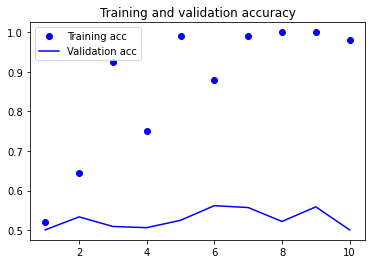

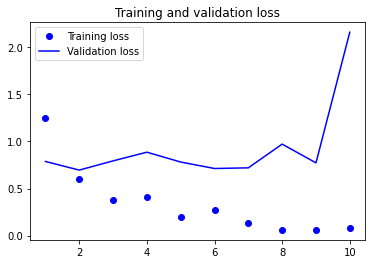

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 150ms/step - loss: 0.6924 - acc: 0.4900 - val_loss: 0.6918 - val_acc: 0.5304
Epoch 2/10
7/7 [==============================] - 1s 226ms/step - loss: 0.5106 - acc: 0.9550 - val_loss: 0.6940 - val_acc: 0.5299
Epoch 3/10
7/7 [==============================] - 1s 138ms/step - loss: 0.3010 - acc: 0.9750 - val_loss: 0.6967 - val_acc: 0.5291
Epoch 4/10
7/7 [==============================] - 1s 123ms/step - loss: 0.1375 - acc: 1.0000 - val_loss: 0.7072 - val_acc: 0.5308
Epoch 5/10
7/7 [==============================] - 1s 225ms/step - loss: 0.0671 - acc: 1.0000 - val_loss: 0.7089 - val_acc: 0.5273
Epoch 6/10
7/7 [==============================] - 1s 107ms/step - loss: 0.0338 - acc: 1.0000 - val_loss: 0.7108 - val_acc: 0.5318
Epoch 7/10
7/7 [==============================] - 1s 121ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.7146 - val_acc: 0.5308
Epoch 8/10
7/7 [==============================] - 1s 118ms/step - loss: 0.0108 - acc: 1.00

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 2.1734 - acc: 0.5015


[2.1734461784362793, 0.501479983329773]